# Infected Malaria Cell Image Classification using Deep Learning

## Importing Neccessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("C:/Users/RK/Desktop/MalariaCells_DS/cell_images"))


['Parasitized', 'Uninfected']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import tensorflow as tf 
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\RK\AppData\Local\Continuum\anacond

In [12]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

In [40]:
import h5py
from keras.models import load_model
from keras.models import model_from_json

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


### Loading the data

In [3]:
infected_data = os.listdir('C:/Users/RK/Desktop/MalariaCells_DS/cell_images/Parasitized/')
print(infected_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('C:/Users/RK/Desktop/MalariaCells_DS/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


### Visualization of Infected and Uninfected Cells

1. Infected Data

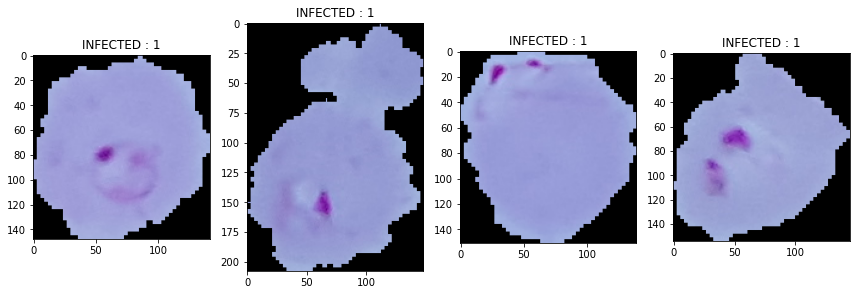

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/RK/Desktop/MalariaCells_DS/cell_images/Parasitized' + "/" + infected_data[i])
    plt.imshow(img)
    plt.title('INFECTED : 1')
    plt.tight_layout()
plt.show()

2. Unifected Data

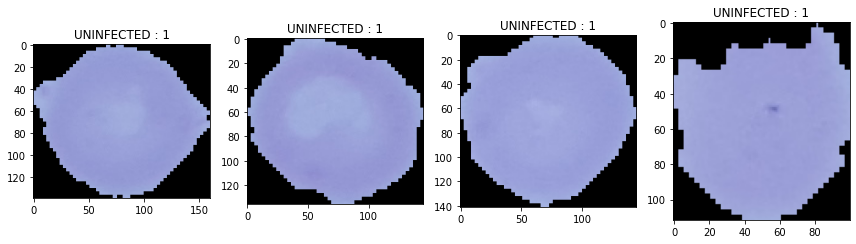

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/RK/Desktop/MalariaCells_DS/cell_images/Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 1')
    plt.tight_layout()
plt.show()

### Data Preprocessing

In [6]:
data = []
labels = []
for img in infected_data:
    try:
        img_read = plt.imread('C:/Users/RK/Desktop/MalariaCells_DS/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_aray=img_array/255
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('C:/Users/RK/Desktop/MalariaCells_DS/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_array= img_array/255
        data.append(img_array)
        labels.append(0)
    except:
        None

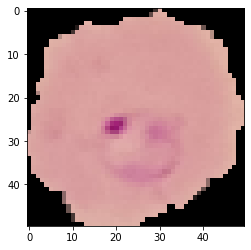

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

### Data Splitting

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42)

In [10]:
y_train = np_utils.to_categorical(y_train,  2)
y_test = np_utils.to_categorical(y_test,  2)

In [11]:
print(f'Shape of training image : {x_train.shape}')
print(f'Shape of testing image : {x_test.shape}')
print(f'Shape of training labels : {y_train.shape}')
print(f'Shape of testing labels : {y_test.shape}')

Shape of training image : (22046, 50, 50, 3)
Shape of testing image : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels : (5512, 2)


### Model Building

## The Architecture of the CNN model

Creating a model which takes (None, 50, 50, 3) input. Stack 3 convolutional layers with kernel size (3, 3) with a  number of filters (32, 32, 32). Add 2×2 pooling layer after every 2 convolutional layers. Add a dense layer with 512 neurons and a second dense layer with two neurons for classes.

In [13]:
inputShape= (50,50,3)
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis =-1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
__________

In [15]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

### Model Evaluation 

In [16]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Train on 22046 samples, validate on 5512 samples
Epoch 1/25
22046/22046 [==============================] - 226s 10ms/step - loss: 0.0021 - acc: 0.9990 - val_loss: 3.6750e-06 - val_acc: 1.0000
Epoch 2/25
22046/22046 [==============================] - 193s 9ms/step - loss: 5.0629e-05 - acc: 1.0000 - val_loss: 1.5235e-06 - val_acc: 1.0000
Epoch 3/25
22046/22046 [==============================] - 220s 10ms/step - loss: 6.4047e-06 - acc: 1.0000 - val_loss: 4.1908e-07 - val_acc: 1.0000
Epoch 4/25
22046/22046 [==============================] - 226s 10ms/step - loss: 6.0973e-06 - acc: 1.0000 - val_loss: 2.9634e-07 - val_acc: 1.0000
Epoch 5/25
22046/22046 [==============================] - 194s 9ms/step - loss: 3.4451e-06 - acc: 1.0000 - val_loss: 2.3589e-07 - val_acc: 1.0000
Epoch 6/25
22046/22046 [==============================] - 195s 9ms/step - loss: 2.0516e-06 - acc: 1.0000 - val_loss: 2.1754e-07 - val_acc: 1.0000
Epoch 7/25
22046/22046 [==============================] - 195s 9ms/step - lo

In [17]:
print(H.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


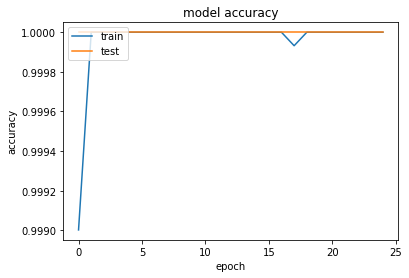

In [18]:
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

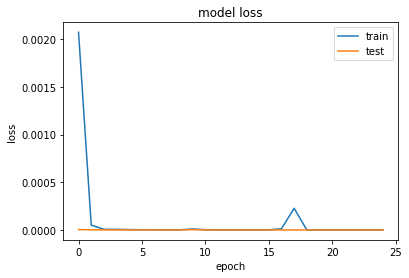

In [19]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [20]:
# make predictions on the test set
preds = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1)))

1.0


In [22]:

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2743
           1       1.00      1.00      1.00      2769

    accuracy                           1.00      5512
   macro avg       1.00      1.00      1.00      5512
weighted avg       1.00      1.00      1.00      5512



In [23]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[2743    0]
 [   0 2769]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

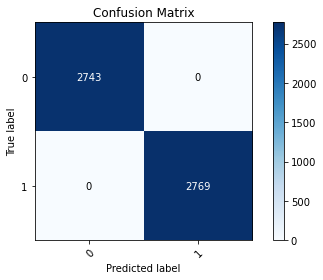

In [24]:
class_names=np.array((0,1))
plot_confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')

In [25]:
model.save("malaria_cell.h5") #the model is saved with the name malaria_cell.h5